<a href="https://colab.research.google.com/github/ilhamAdhim/Dicoding---Belajar-Pengembangan-Machine-Learning/blob/main/Latihan_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


1. **Tokenization** <br>
Tokenization is the first thing to do in NLP, The purpose of tokenization is to give each registered words into a token / number so that it can be identified by the ML model 


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [ ]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

In [ ]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [ ]:
tokenizer.fit_on_texts(teks)

In [ ]:
sequences = tokenizer.texts_to_sequences(teks)

In [ ]:
print("ini hasil tokenisasi : ", tokenizer.word_index)

ini hasil tokenisasi :  {'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)
print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=7)

sequences_samapanjangtruncate = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=7,
                                      truncating='post')

In [ ]:
print(sequences_samapanjangtruncate)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 7  8  9 10 11]]


In [ ]:
print(sequences_samapanjang)


[[ 3  4  2  0  0  0  0]
 [ 2  5  6  0  0  0  0]
 [ 7  8  9 10 11 12  0]]




---

2. **Embedding** <br>
Embedding plays role as a text classification. This can be done by mapping the text into vector or lines. The similar words will have similar vector value too.  

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(jumlah_kata, dimensi_embedding, panjang_input),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [ ]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
# num_epochs = 30
# model.fit(padded_latih, label_latih, 
#           epochs=num_epochs, 
#           validation_data=(padded_test, label_test))



---

**Praktek - Binary Text Classification**


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dicoding - NLP - Sentiment Analysis /yelp_labelled.txt', names=['sentence', 'label'], sep='\t')
print(df)

                                              sentence  label
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [ ]:
# Lihat 5 row data sample terakhir
df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
# Membagi 1000 dataset ke training set dan test set
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [ ]:
"""
Agar teks dapat dipahami oleh model, kita harus lakukan tokenisasi. 
Gunakan fungsi tokenizer pada data latih dan data test. 
Jangan lupa gunakan fungsi pad_sequences agar setiap sequence sama panjang.
"""
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
# Pembuatan model untuk training data, Lebih cocok menggunakan GlobalAveragePooling1D dibanding Flatten untuk case NLP.
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 1s - loss: 0.6927 - accuracy: 0.5288 - val_loss: 0.6929 - val_accuracy: 0.4700
Epoch 2/30
25/25 - 0s - loss: 0.6902 - accuracy: 0.6050 - val_loss: 0.6912 - val_accuracy: 0.5450
Epoch 3/30
25/25 - 0s - loss: 0.6869 - accuracy: 0.6288 - val_loss: 0.6888 - val_accuracy: 0.5550
Epoch 4/30
25/25 - 0s - loss: 0.6811 - accuracy: 0.6587 - val_loss: 0.6846 - val_accuracy: 0.5950
Epoch 5/30
25/25 - 0s - loss: 0.6729 - accuracy: 0.6762 - val_loss: 0.6793 - val_accuracy: 0.5900
Epoch 6/30
25/25 - 0s - loss: 0.6628 - accuracy: 0.6925 - val_loss: 0.6711 - val_accuracy: 0.6300
Epoch 7/30
25/25 - 0s - loss: 0.6489 - accuracy: 0.7000 - val_loss: 0.6620 - val_accuracy: 0.6300
Epoch 8/30
25/25 - 0s - loss: 0.6307 - accuracy: 0.7312 - val_loss: 0.6524 - val_accuracy: 0.6700
Epoch 9/30
25/25 - 0s - loss: 0.6099 - accuracy: 0.7450 - val_loss: 0.6356 - val_accuracy: 0.6750
Epoch 10/30
25/25 - 0s - loss: 0.5866 - accuracy: 0.7613 - val_loss: 0.6203 - val_accuracy: 0.7100
Epoch 11/30
25/25 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


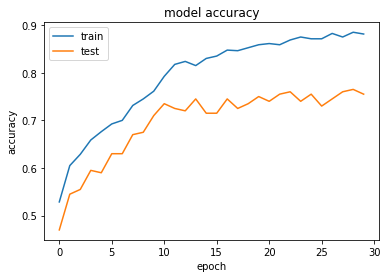

In [ ]:
# list all data in history
print(history.history.keys())

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

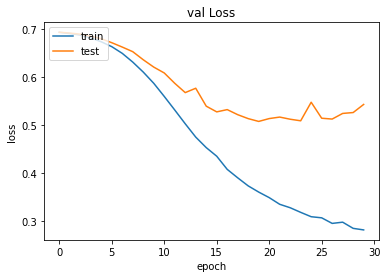

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('val Loss')
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Multiclass Text Classification with Long Short-Term Memory (LSTM) Layer**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/imdb_indonesian_movies_2.csv')
df = df.drop(columns=['judul_film'])

df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [2]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [5]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values
print(df_baru['ringkasan_sinopsis'][0])

Raden Mas Said putra sulung Tumenggung Wilarikta di bawah Kerajaan Majapahit yang berkuasa di wilayah Tuban melihat sekeluarga miskin yang menderita busung lapar. Ia merasa sangat prihatin dan hati nuraninya tergugah untuk menolong. Kemudian ia mencoba secara diam-diam mengambil makanan dari lumbung orang tuanya. Perbuatan itu tidak disetujui orang tuanya bahkan ia dihukum sekap di gudang makanan itu. Sejak kejadian itu RM Said yang tumbuh dewasa tidak betah tinggal di rumah. Ia berkelana dari daerah satu ke daerah lainnya. Dari sanalah ia tahu betapa banyak penyelewengan dan kesewenang-wenangan para lurah yang munafik. Mereka selalu mengkambing-hitamkan Tumenggung untuk menutupi kejahatannya. Atas laporan RM Said ayahnya kemudian sadar. Tetapi kemudian ia dianggap sebagai sumber fitnah. Dalam kelananya kemudian ia bertemu dengan Sunan Bonang yang banyak mencurahkan ilmunya kepada RM Said. Ia pun kemudian melakukan tapa di pinggir kali. Berkat ketabahannya menghadapi berbagai cobaan RM

In [6]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [11]:
print(sinopsis_latih, "\n")


['Bayu (Bayu Skak) mencintai Susan (Cut Meyriska). Karena dia merasa rendah diri dengan keadaannya sendiri yang biasa-biasa saja Bayu menyimpan perasaan itu di dalam hatinya. Segala sesuatunya berubah sejak Susan mengirim obrolan suara ke Bayu. Dia pikir Susan memberi isyarat untuk didekati. Ternyata Susan menggunakan Bayu untuk membantunya menyediakan pecel (salad kacang tanah) untuk konsumsi teman OSIS-nya. Bayu bertekad untuk menjadikan dirinya lebih populer daripada Roy (Indra Wijaya) pacar Susan gitaris band sekolah. Bayu membentuk band dengan Doni (Joshua Suherman) Yayan (Tutus Thomson) dan Nando (Brandon Salim). Mereka menamai band mereka Yowis Ben. Ketika Yowis Ben tumbuh di dunia musik kota Malang perpecahan antara personil Yowis Ben mulai muncul.'
 'Seorang pekerja salon perempuan murah dan pembuat subtitle DVD bajakan jatuh cinta selama pemilihan presiden yang bergejolak di Indonesia.'
 'Ketika cinta bertasbih 2 menceritakan tentang azzam yang telah menyelesaikan perkuliahan

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 19
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/19
26/26 - 15s - loss: 1.6101 - accuracy: 0.1891 - val_loss: 1.6125 - val_accuracy: 0.1891
Epoch 2/19
26/26 - 12s - loss: 1.6064 - accuracy: 0.2239 - val_loss: 1.6119 - val_accuracy: 0.1741
Epoch 3/19
26/26 - 12s - loss: 1.5697 - accuracy: 0.3706 - val_loss: 1.6002 - val_accuracy: 0.2388
Epoch 4/19
26/26 - 12s - loss: 1.3890 - accuracy: 0.4092 - val_loss: 1.7223 - val_accuracy: 0.2488
Epoch 5/19
26/26 - 12s - loss: 1.1034 - accuracy: 0.5410 - val_loss: 2.0239 - val_accuracy: 0.2438
Epoch 6/19
26/26 - 12s - loss: 0.7180 - accuracy: 0.7226 - val_loss: 2.2590 - val_accuracy: 0.2637
Epoch 7/19
26/26 - 12s - loss: 0.3546 - accuracy: 0.9017 - val_loss: 2.8864 - val_accuracy: 0.2786
Epoch 8/19
26/26 - 12s - loss: 0.1356 - accuracy: 0.9726 - val_loss: 3.5649 - val_accuracy: 0.2836
Epoch 9/19
26/26 - 12s - loss: 0.0899 - accuracy: 0.9851 - val_loss: 3.7152 - val_accuracy: 0.3035
Epoch 10/19
26/26 - 12s - loss: 0.0601 - accuracy: 0.9925 - val_loss: 3.6293 - val_accuracy: 0.2886
Epoch 11/

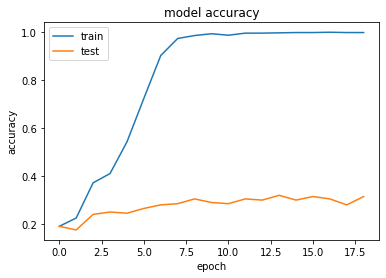

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()